### **Gold ETFs Portfolio Analysis**



A Comprehensive Analysis and Optimization of Gold ETFs in India

---
Description

This code provides a thorough analysis and optimization of selected gold ETFs in India, leveraging historical data to construct an efficient portfolio. The process includes:
- Retrieving historical adjusted close prices for a range of gold ETFs.
- Calculating daily returns and visualizing them.
- Plotting the covariance matrix to understand the relationships between different ETFs.
- Using modern portfolio theory to optimize the portfolio by minimizing risk.
- Visualizing the optimal portfolio weights, efficient frontier, and generating a comprehensive report.

By integrating advanced tools such as **yfinance** for data retrieval and **riskfolio** for optimization, this code aims to assist in making informed investment decisions in the gold ETF market.


In [ ]:
pip install pybind11

In [ ]:
pip install cvxpy


In [ ]:
pip install riskfolio-lib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 65.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 57.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 17.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.3.4
    Uninstallin

In [ ]:
import yfinance as yf

In [ ]:
import riskfolio as rp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cvxpy as cp

In [ ]:
import warnings
warnings.filterwarnings


<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

In [ ]:
start='2014-04-01'
end='2023-04-01'

ANALYSIS FROM APR 2014 - APR 2023

[*********************100%%**********************]  8 of 8 completed


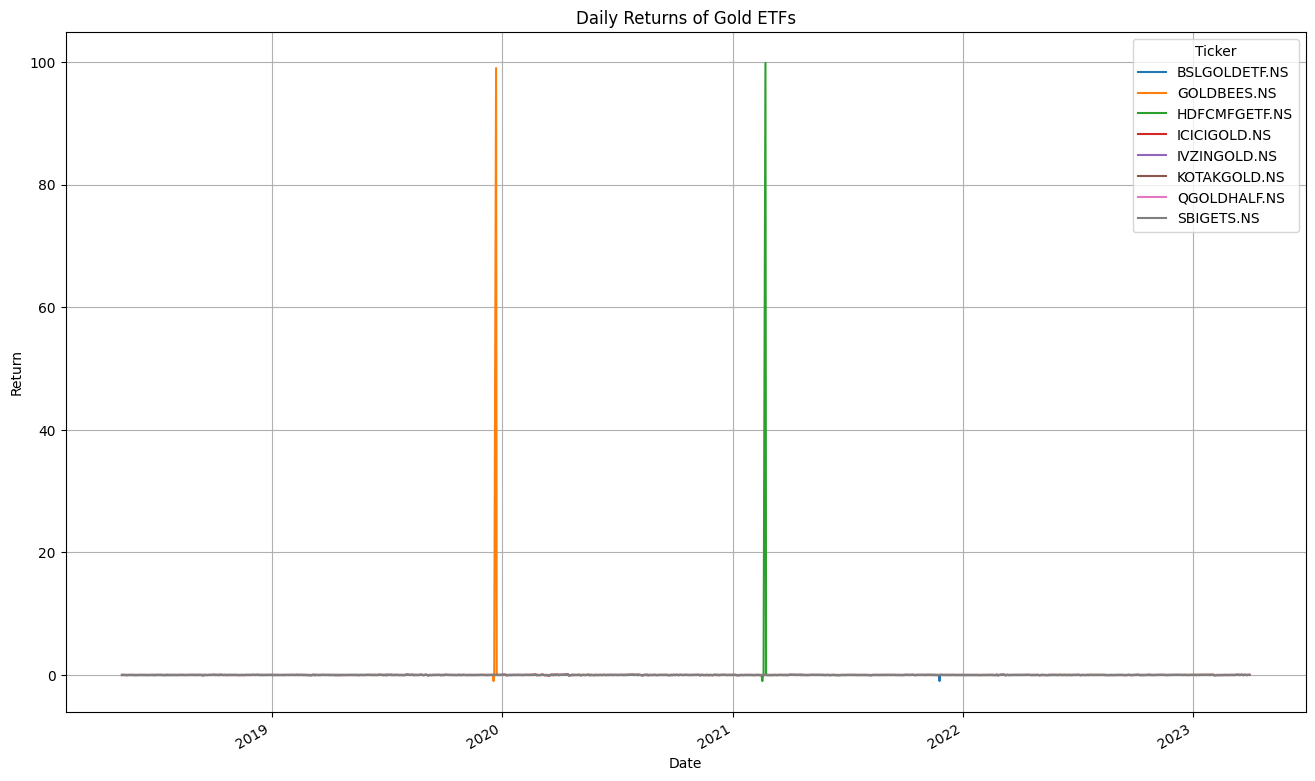

In [ ]:
ETF = [
    'GOLDBEES.NS', 'HDFCMFGETF.NS', 'SBIGETS.NS',
    'ICICIGOLD.NS', 'BSLGOLDETF.NS', 'KOTAKGOLD.NS',
    'QGOLDHALF.NS', 'IVZINGOLD.NS'
]


data = yf.download(ETF, start=start, end=end)['Adj Close']


returns = data.pct_change().dropna()
returns.plot(figsize=(16,10))
plt.title("Daily Returns of Gold ETFs")
plt.xlabel("Date")
plt.ylabel("Return")
plt.grid(True)
plt.show()


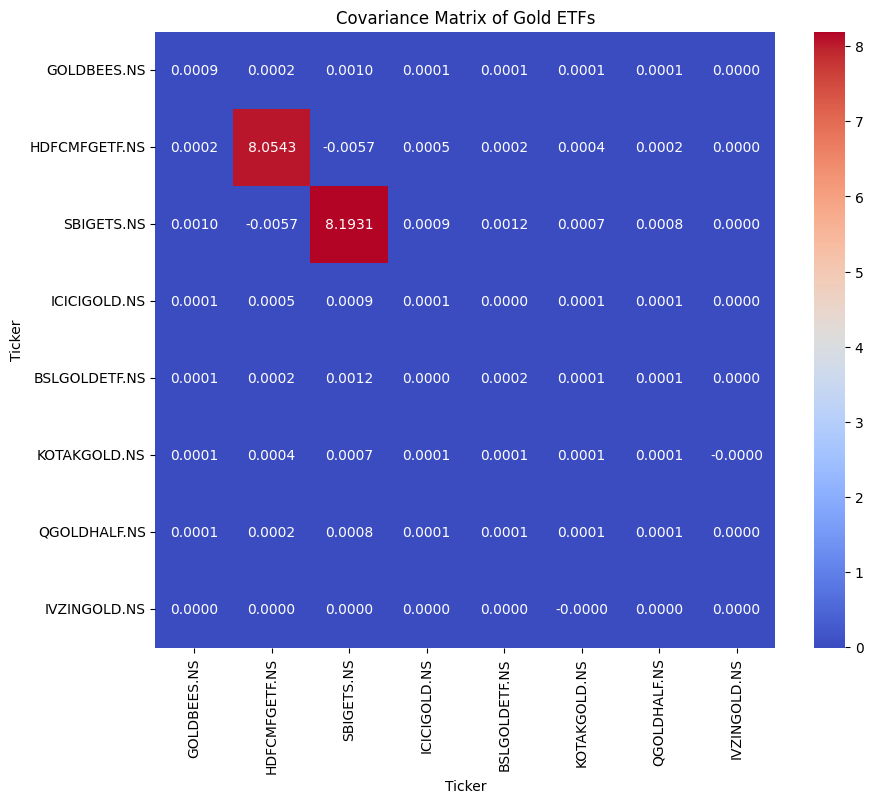

In [ ]:
# Calculate covariance matrix
cov_matrix = returns.cov()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, fmt=".4f", cmap='coolwarm', xticklabels=ETF, yticklabels=ETF)
plt.title("Covariance Matrix of Gold ETFs")
plt.show()


PORTFOLIO OPTIMISATOIN USING HISTORICAL MEAN

In [ ]:
# Portfolio optimization
method_mu = 'hist'  # Historical mean
method_cov = 'hist'  # Historical covariance
hist = True
model = 'Classic'  # Classic mean-variance optimization
rm = 'MV'  # Risk measure
obj = 'MinRisk'  # Minimize risk objective
rf = 0  # Risk-free rate
l = 0  # Parameter for utility function (not used here)


Optimal Weights:
                    weights
BSLGOLDETF.NS  8.722264e-04
GOLDBEES.NS    4.136974e-10
HDFCMFGETF.NS  2.003293e-10
ICICIGOLD.NS   1.003246e-01
IVZINGOLD.NS   1.563696e-02
KOTAKGOLD.NS   6.650750e-02
QGOLDHALF.NS   2.527574e-07
SBIGETS.NS     8.166585e-01


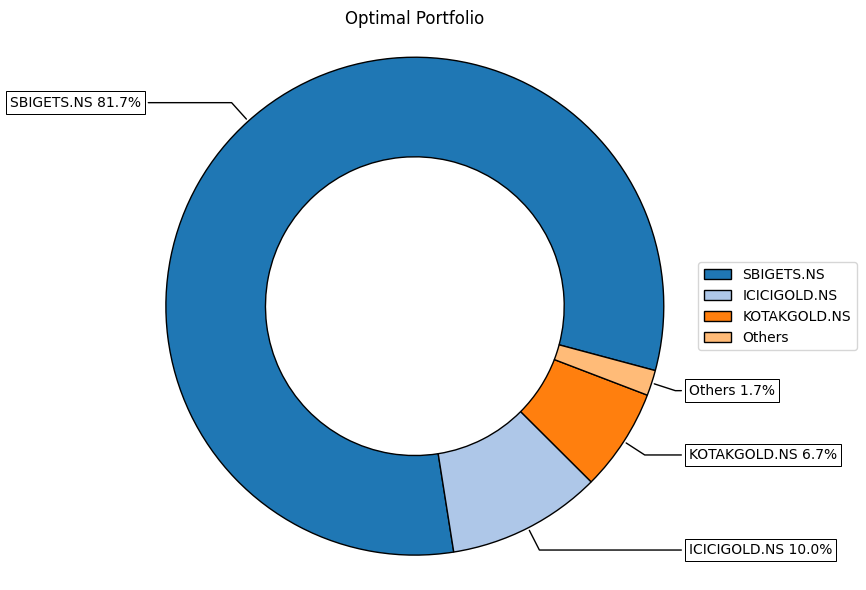

In [ ]:
# Initialize portfolio object
port = rp.Portfolio(returns=returns)

# Calculate assets statistics
port.assets_stats(method_mu=method_mu, method_cov=method_cov)

# Perform portfolio optimization
w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
print("Optimal Weights:")
print(w)

# Plot pie chart of optimal portfolio weights
ax = rp.plot_pie(w=w, title="Optimal Portfolio", others=0.05, cmap='tab20')
plt.show()


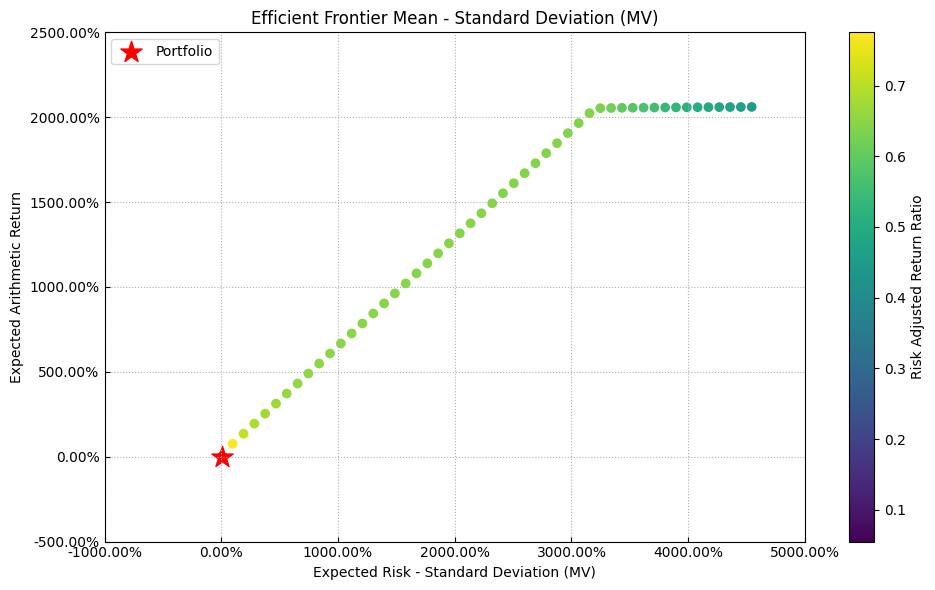

In [ ]:
#Calculate efficient frontier
frontier = port.efficient_frontier(model=model, rm=rm, points=50, rf=rf, hist=hist)

# Plot efficient frontier
ax = rp.plot_frontier(w_frontier=frontier, mu=port.mu, cov=port.cov, returns=returns, rm=rm,
                      rf=rf, cmap='viridis', w=w)


plt.show()


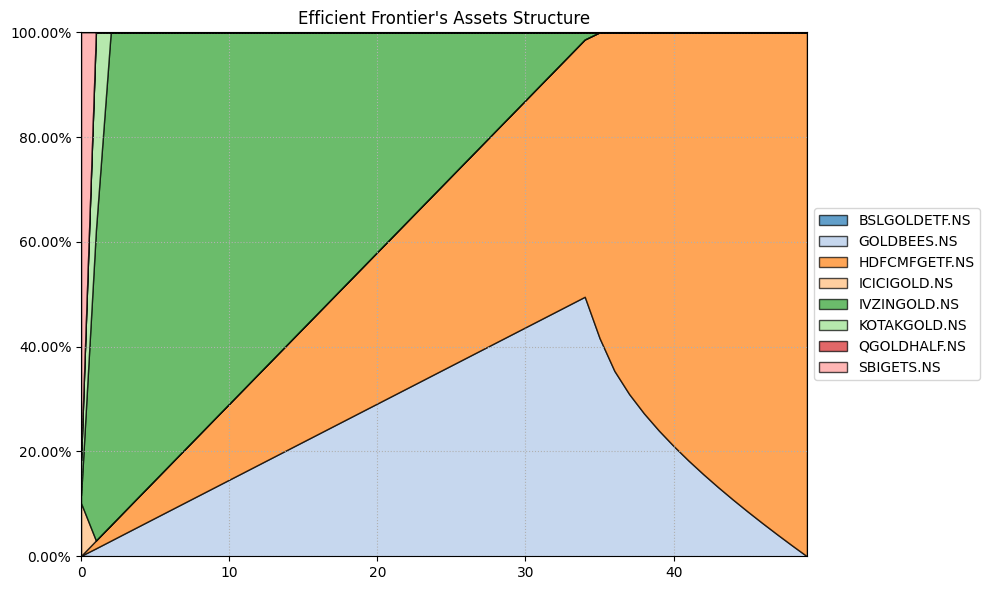

In [ ]:
# Plot area plot of efficient frontier
ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20")
plt.show()

/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


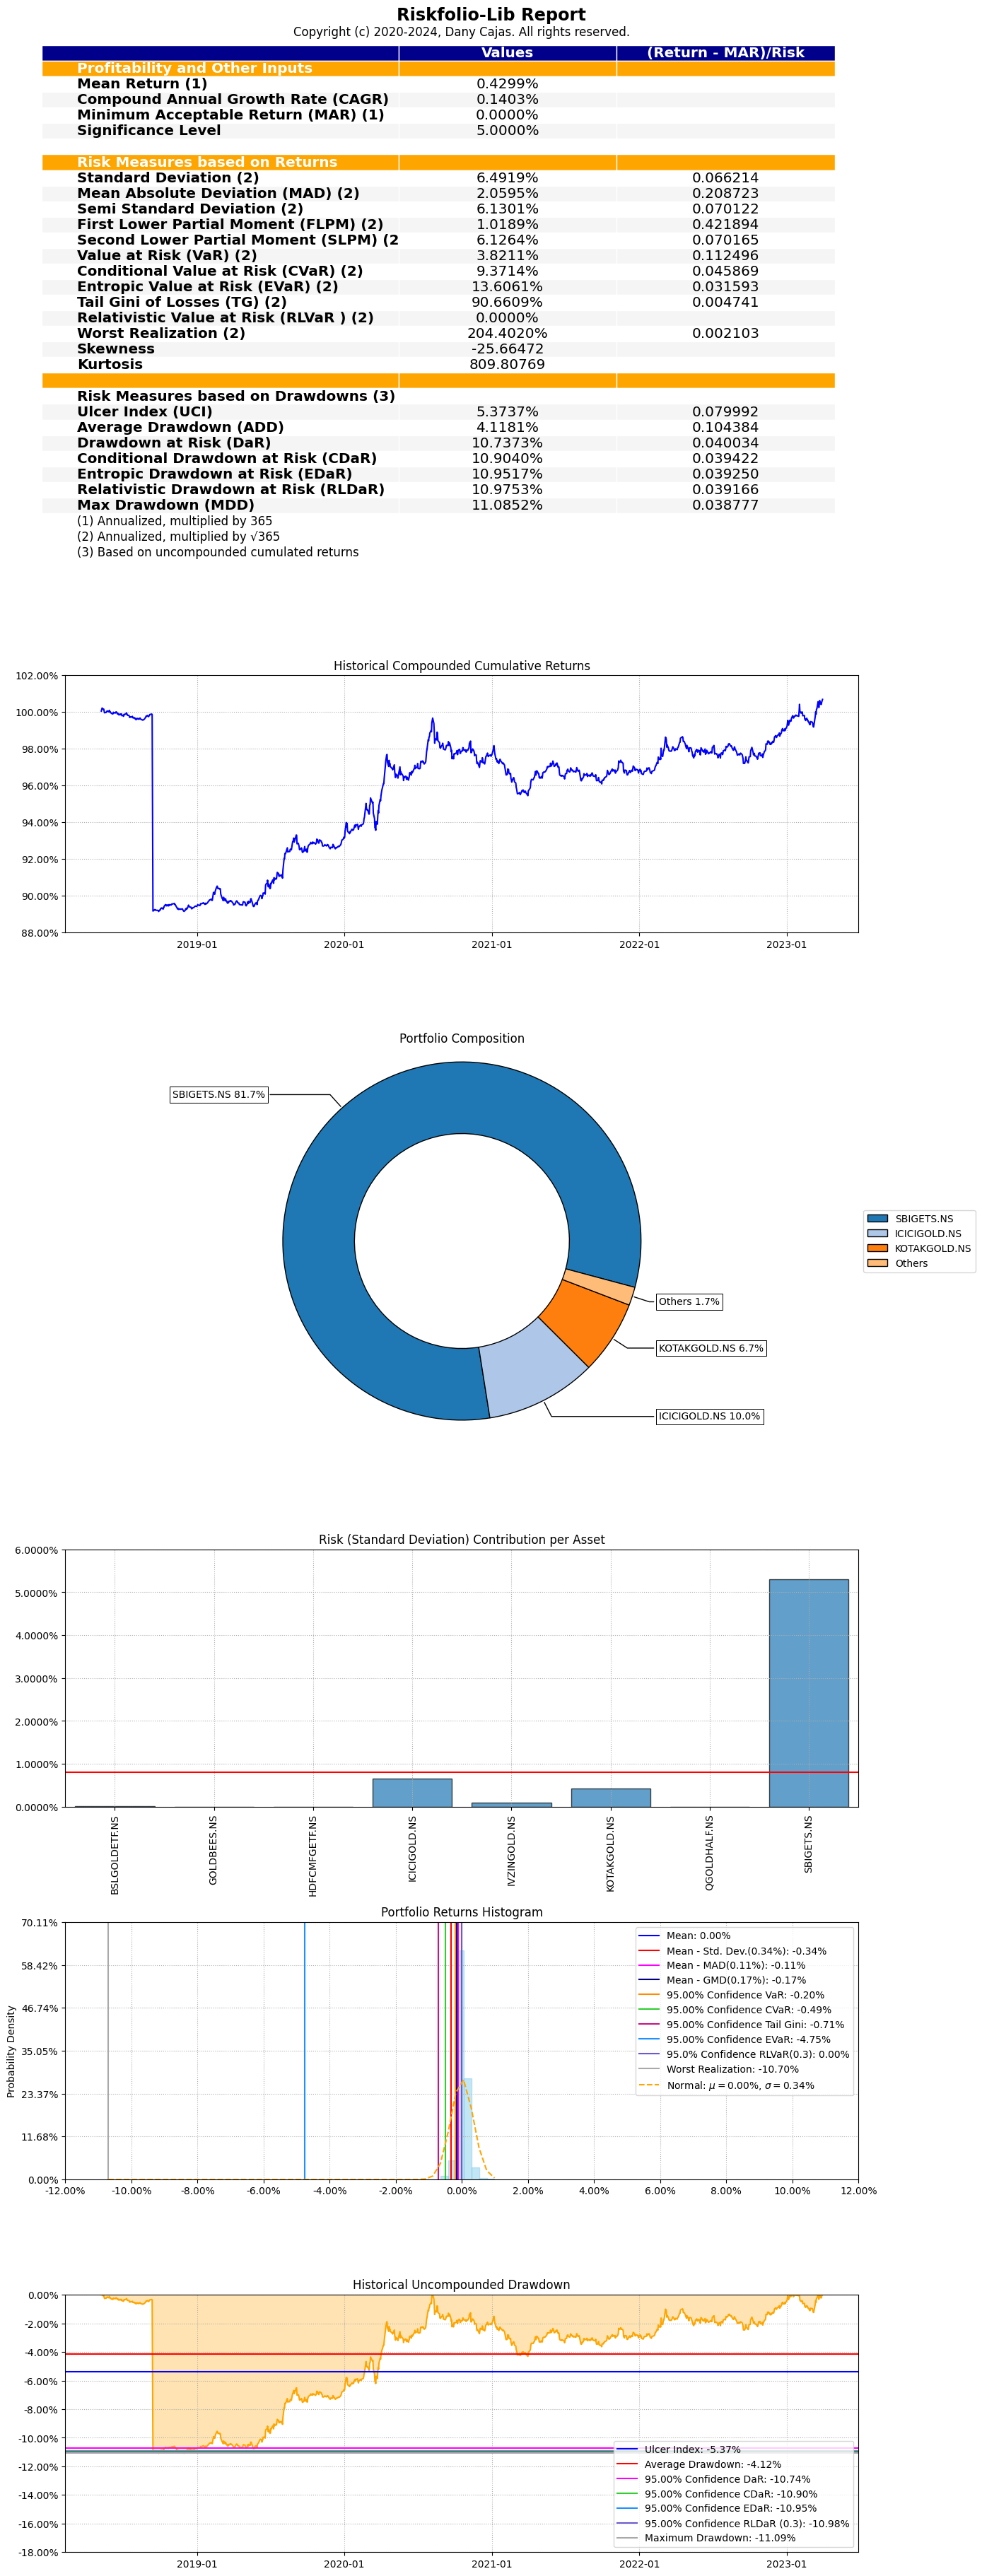

In [ ]:
#Jupyter notebook report
ax = rp.jupyter_report(returns, w, rm=rm, t_factor=365, days_per_year=365)
plt.show()

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import statsmodels.api as sm
from arch import arch_model
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define the tickers and download data
tickers = [
    'GOLDBEES.NS', 'HDFCMFGETF.NS', 'SBIGETS.NS',
    'ICICIGOLD.NS', 'BSLGOLDETF.NS', 'KOTAKGOLD.NS',
    'QGOLDHALF.NS', 'IVZINGOLD.NS'
]

start_date = "2020-01-01"
end_date = "2024-07-10"

data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
returns = data.pct_change().dropna()

# Select one ETF to model (e.g., 'GOLDBEES.NS')
selected_etf = 'GOLDBEES.NS'
returns_series = returns[selected_etf]

# ARIMA Model
arima_order = (1, 1, 1)  # Adjust the order as needed
arima_model = sm.tsa.ARIMA(returns_series, order=arima_order)
arima_results = arima_model.fit()
print(f"ARIMA Summary for {selected_etf}:\n", arima_results.summary())

# GARCH Model
garch_model = arch_model(returns_series, vol='Garch', p=1, q=1)
garch_results = garch_model.fit(disp="off")
print(f"GARCH Summary for {selected_etf}:\n", garch_results.summary())

# Neural Network
# Prepare the data for the neural network
returns_array = returns_series.values
X = returns_array[:-1]  # Features (past returns)
y = returns_array[1:]   # Target (next return)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1), y, test_size=0.2, random_state=42)

# Build a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1)

# Predicting on the test set
predictions = model.predict(X_test)

# Plotting the predictions against actual returns
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Returns', color='blue')
plt.plot(predictions, label='Predicted Returns', color='orange')
plt.title(f'Neural Network Predictions vs Actual Returns for {selected_etf}')
plt.xlabel('Sample')
plt.ylabel('Return')
plt.legend()
plt.show()


ARIMA MODEL OPTIMISATION


[*********************100%%**********************]  8 of 8 completed
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

          Ticker           AIC           BIC         AR(1)         MA(1)
0    GOLDBEES.NS   6845.638727   6861.447577  7.812986e-05 -9.998598e-01
1  HDFCMFGETF.NS   6870.203216   6886.012066 -4.713332e-05 -9.995886e-01
2     SBIGETS.NS -32744.801566 -32728.992716 -3.469621e-10 -3.469587e-10
3   ICICIGOLD.NS  -9811.028086  -9795.219236 -2.637916e-03 -9.994124e-01
4  BSLGOLDETF.NS  -6161.591740  -6145.782890 -2.873272e-02 -9.999002e-01
5   KOTAKGOLD.NS  -9565.634007  -9549.825157 -4.753184e-02 -9.997160e-01
6   QGOLDHALF.NS  -9681.290791  -9665.481941 -1.606334e-02 -9.998529e-01
7   IVZINGOLD.NS  -8830.402170  -8814.593320 -2.312519e-01 -9.999293e-01
      GOLDBEES.NS  HDFCMFGETF.NS  SBIGETS.NS  ICICIGOLD.NS  BSLGOLDETF.NS  \
1437     0.068409       0.067415         0.0      0.000346       0.000076   
1438     0.068415       0.067412         0.0      0.000345      -0.000067   
1439     0.068415       0.067412         0.0      0.000345      -0.000063   
1440     0.068415       0.067412   

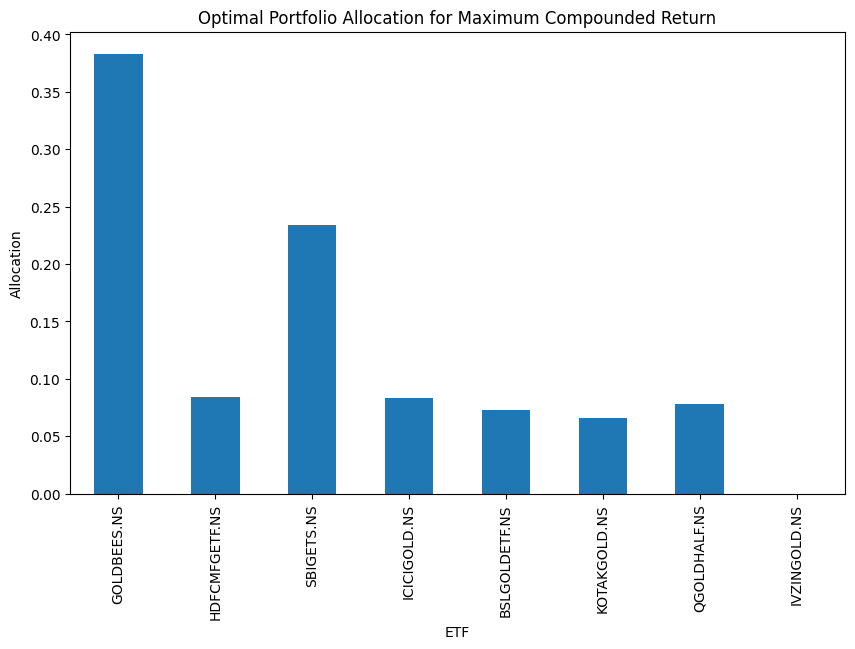

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Define the tickers and download data
tickers = [
    'GOLDBEES.NS', 'HDFCMFGETF.NS', 'SBIGETS.NS',
    'ICICIGOLD.NS', 'BSLGOLDETF.NS', 'KOTAKGOLD.NS',
    'QGOLDHALF.NS', 'IVZINGOLD.NS'
]

start_date = "2018-01-01"
end_date = "2024-07-10"

data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
returns = data.pct_change().dropna()

# ARIMA Model Fitting
arima_order = (1, 1, 1)  # Adjust the order as needed
arima_results = {}

for ticker in tickers:
    model = sm.tsa.ARIMA(returns[ticker], order=arima_order)
    result = model.fit()
    arima_results[ticker] = result

# Display ARIMA results in a tabular format
summary_data = []

for ticker, result in arima_results.items():
    summary_data.append({
        'Ticker': ticker,
        'AIC': result.aic,
        'BIC': result.bic,
        'AR(1)': result.arparams[0] if len(result.arparams) > 0 else np.nan,
        'MA(1)': result.maparams[0] if len(result.maparams) > 0 else np.nan
    })

summary_df = pd.DataFrame(summary_data)
print(summary_df)

# Predict future returns
forecast_horizon = 30  # Forecast 30 days ahead
predicted_returns = {}

for ticker, result in arima_results.items():
    forecast = result.get_forecast(steps=forecast_horizon)
    predicted_mean = forecast.predicted_mean
    predicted_returns[ticker] = predicted_mean

predicted_returns_df = pd.DataFrame(predicted_returns)
print(predicted_returns_df)

# Optimize Portfolio for Maximum Compounded Return
def compound_return(weights, returns):
    portfolio_return = np.dot(returns, weights)
    return -np.prod(1 + portfolio_return)**(1/len(returns)) - 1

# Normalize predicted returns for optimization
scaler = StandardScaler()
normalized_returns = scaler.fit_transform(predicted_returns_df)

# Constraints: Sum of weights equals 1
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
# Bounds: weights between 0 and 1
bounds = [(0, 1) for _ in tickers]
# Initial guess
initial_guess = [1/len(tickers)] * len(tickers)

# Optimize
result = minimize(compound_return, initial_guess, args=(normalized_returns), method='SLSQP', bounds=bounds, constraints=constraints)
optimal_weights = result.x

# Display optimal weights
allocation = pd.DataFrame({'Ticker': tickers, 'Allocation': optimal_weights})
print(allocation)

# Plot allocation
allocation.set_index('Ticker').plot(kind='bar', figsize=(10, 6), legend=False)
plt.title('Optimal Portfolio Allocation for Maximum Compounded Return')
plt.xlabel('ETF')
plt.ylabel('Allocation')
plt.show()
